# Curso de Machine Learning
# Estadística
## Sebastian Filipigh, Luis Duarte, Magdalena Lucini
### Agosto 2023, FaCENA - UNNE
### contact:  sfilipigh@comunidad.unne.edu.ar; luis.duarte@comunidad.unne.edu.ar; mmlucini@comunidad.unne.edu.ar



**Objetivos:**


*   Explorar un conjunto de datos reales y hacer un breve análisis estadístico.
*   Trabajar con distribuciones de probabilidad en situaciones reales..

Datos obtenidos de NOAA (National Centers for Environmental Information); contiene variables climáticas de las ciudades de Buenos Aires, Corrientes, Mendoza y Resistencia desde el 01/01/1980 al 24/08/2023.

**Antes de empezar:**

Necesitamos importar las siguientes librerias:

- matplotlib (gráficos en 2D)
- seaborn (visualización de datos estadísticos)
- pandas (estructuras de datos y análisis de herramientas de datos)

In [18]:
%matplotlib inline
%pylab inline
import seaborn as sns
import pandas as pd
from scipy.stats.mstats import zscore
import warnings
warnings.filterwarnings("ignore") # disable warnings
pylab.rcParams['figure.figsize']=(10,10) # graph size

Populating the interactive namespace from numpy and matplotlib


## Primera parte: Análisis exploratorio de los datos ##


1.1) Importe la base de datos y realice un análisis estadístico exploratorio de sus variables.

a) Si trabaja en google colab:



In [19]:
from google.colab import files
uploaded = files.upload()




Saving Datos_est.csv to Datos_est.csv


In [21]:
import pandas as pd
import io

data1 = pd.read_csv(io.BytesIO(uploaded['Datos_est.csv']))


b) Si no trabaja en google colab, importe los datos desde un directorio local (especifique path de ser necesario).


In [5]:
# importación de datos
data1 = pd.read_csv('Datos_est.csv')



*   Observe qué variables tiene la base de datos.
*   Obtenga las medidas de resumen para las variables.



In [22]:
# Observemos con qué variables cuenta esta base de datos:
data1

,Unnamed: 0,NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,1,"CORRIENTES, AR",1980-01-01,0.0,22.0,NaN,13.0
1,2,"CORRIENTES, AR",1980-01-02,0.0,24.0,NaN,14.0
2,3,"CORRIENTES, AR",1980-01-03,0.0,25.7,NaN,14.0
3,4,"CORRIENTES, AR",1980-01-04,NaN,28.1,NaN,NaN
4,5,"CORRIENTES, AR",1980-01-05,NaN,24.3,33.0,NaN
...,...,...,...,...,...,...,...
60445,60446,"MENDOZA AERO, AR",2023-08-20,NaN,11.7,19.5,4.5
60446,60447,"MENDOZA AERO, AR",2023-08-21,NaN,20.0,NaN,7.2
60447,60448,"MENDOZA AERO, AR",2023-08-22,NaN,12.0,27.0,7.2
60448,60449,"MENDOZA AERO, AR",2023-08-23,0.0,8.3,NaN,6.3


In [23]:
# Obtengamos las medidas de resumen:
data1.describe()

,Unnamed: 0,PRCP,TAVG,TMAX,TMIN
count,60450.000000,25476.000000,53025.000000,40409.000000,51998.000000
mean,30225.500000,4.864527,19.906985,25.618318,13.656275
std,17450.556223,15.610545,6.339175,6.953313,6.541477
min,1.000000,0.000000,-0.500000,1.500000,-7.500000
25%,15113.250000,0.000000,15.200000,20.300000,8.800000
50%,30225.500000,0.000000,20.800000,26.200000,14.500000
75%,45337.750000,1.000000,24.900000,31.100000,18.900000
max,60450.000000,373.100000,37.100000,44.400000,31.000000


In [26]:
#Eliminemos la variable PRCP
data1=data1.drop('PRCP',axis=1)
data1

,Unnamed: 0,NAME,DATE,TAVG,TMAX,TMIN
0,1,"CORRIENTES, AR",1980-01-01,22.0,NaN,13.0
1,2,"CORRIENTES, AR",1980-01-02,24.0,NaN,14.0
2,3,"CORRIENTES, AR",1980-01-03,25.7,NaN,14.0
3,4,"CORRIENTES, AR",1980-01-04,28.1,NaN,NaN
4,5,"CORRIENTES, AR",1980-01-05,24.3,33.0,NaN
...,...,...,...,...,...,...
60445,60446,"MENDOZA AERO, AR",2023-08-20,11.7,19.5,4.5
60446,60447,"MENDOZA AERO, AR",2023-08-21,20.0,NaN,7.2
60447,60448,"MENDOZA AERO, AR",2023-08-22,12.0,27.0,7.2
60448,60449,"MENDOZA AERO, AR",2023-08-23,8.3,NaN,6.3


In [27]:
# Asegurémonos que la variable DATE esté codificada como fecha:
type(data1['DATE'])
data1['DATE'] = pd.to_datetime(data1['DATE'], format='%Y-%m-%d')


*   Filtre la base de datos por ciudad, de los últimos cinco años.
*  Elimine las filas con datos faltantes.

In [100]:
# Filtramos los datos por ciudad:
data_ctes=data1[data1['NAME']=='CORRIENTES, AR']
data_rcia= data1[data1['NAME']=='RESISTENCIA AERO, AR']

# Eliminamos las filas con datos faltantes:
dc=data_ctes.dropna(how='any') #dropna(how='any') elimina filas con datos faltantes.
dr=data_rcia.dropna(how='any')


In [69]:
# Filtramos los datos desde Agosto del 2018 a la actualidad:
import datetime as dt
dc_act= dc[(dc['DATE'].dt.strftime('%Y') >= '2018')]
dr_act= dr[(dr['DATE'].dt.strftime('%Y') >= '2018')]
dc_act


,Unnamed: 0,NAME,DATE,TAVG,TMAX,TMIN
13253,13254,"CORRIENTES, AR",2018-01-04,27.7,35.0,20.0
13255,13256,"CORRIENTES, AR",2018-01-06,27.2,35.7,22.5
13259,13260,"CORRIENTES, AR",2018-01-10,28.3,35.5,24.0
13270,13271,"CORRIENTES, AR",2018-01-21,22.7,24.4,21.6
13271,13272,"CORRIENTES, AR",2018-01-22,25.6,29.5,23.0
...,...,...,...,...,...,...
15275,15276,"CORRIENTES, AR",2023-08-08,14.8,24.2,11.6
15278,15279,"CORRIENTES, AR",2023-08-11,21.6,28.0,15.6
15279,15280,"CORRIENTES, AR",2023-08-12,14.8,26.3,7.6
15280,15281,"CORRIENTES, AR",2023-08-13,11.7,19.9,4.5




*   Realice un gráfico que les permita ver la evolución de la temepratura media de ambas ciudades en los últimos 5 años.





Text(0.5, 1.0, 'Evolución de la temperatura media- Rcia')

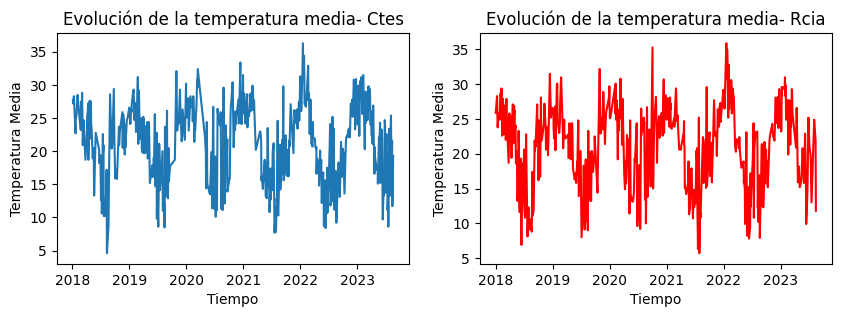

In [30]:
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(dc_act.DATE, dc_act.TAVG)
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('Temperatura Media')
ax1.set_title('Evolución de la temperatura media- Ctes')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(dr_act.DATE, dr_act.TAVG, 'r')
ax2.set_xlabel('Tiempo')
ax2.set_ylabel('Temperatura Media')
#ax2.set_xticks(5)
ax2.set_title('Evolución de la temperatura media- Rcia')



*   Realice un box-plot con la temperatura media de Corrientes, comparando las estaciones de invierno y verano.


Text(0.5, 1.0, 'Temperaturas medias Invierno y Verano en Corrientes')

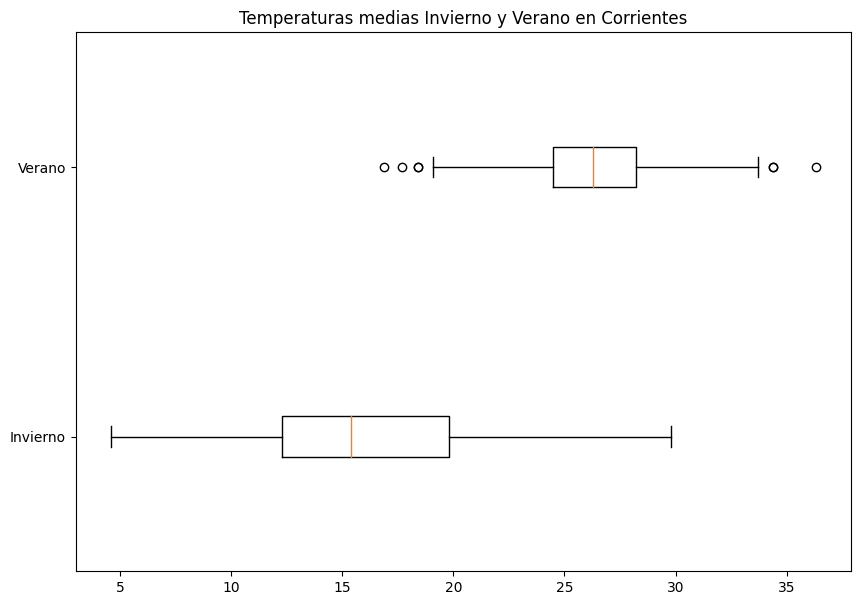

In [31]:

# Filtramos los datos por estación.

dc_inv = dc[(dc['DATE'].dt.strftime('%m') >= '06') & (dc['DATE'].dt.strftime('%m') < '09')]
dc_ver = dc[(dc['DATE'].dt.strftime('%m') == '12') | (dc['DATE'].dt.strftime('%m') < '03')]

fig = figure(figsize =(10, 7))
ax = fig.add_subplot(111)
ax.boxplot([dc_inv.TAVG,dc_ver.TAVG],vert=0)
ax.set_yticklabels(['Invierno', 'Verano'])
title('Temperaturas medias Invierno y Verano en Corrientes')

Para hacer:

*   Compare las temperaturas medias de invierno y verano en las otras ciudades.
*   ¿Se observan los mismos patrones si no se distinguen las temperaturas medias por estación?



**1.2**) Trace el histograma de las temperaturas medias de la ciudad de Corrientes y comente los resultados. Puede usar la función *histplot* de la librería *seaborn* (*sns*).

Text(0.5, 1.0, 'Histograma de temperaturas medias en Corrientes')

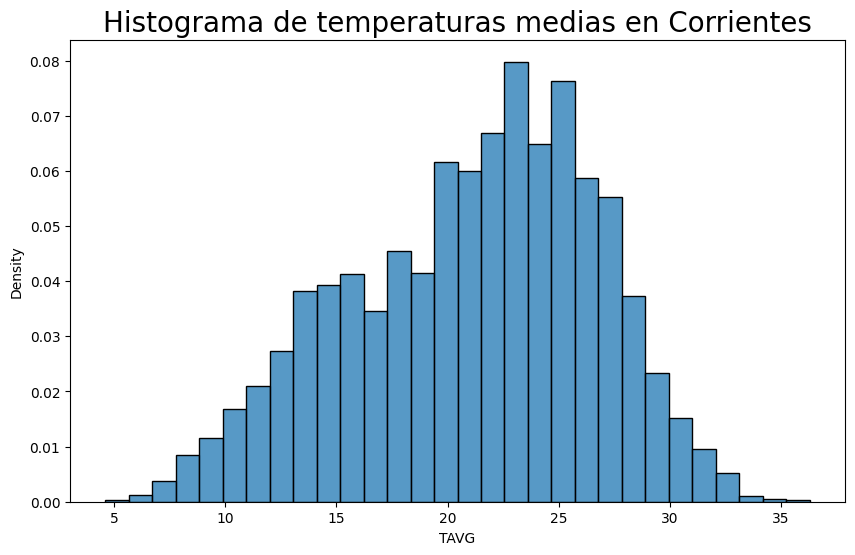

In [70]:
# Realizar un Histograma de la temperatura media de la ciudad de Corrientes:
sns.histplot(dc.TAVG, stat='density')
title('Histograma de temperaturas medias en Corrientes', size=20)

In [71]:
#Media y desvío de TAVG Ctes
m=mean(dc.TAVG)
s=std(dc.TAVG)
print(m,s)

21.096219931271477 5.557384200336515


1.3) a) Queremos ajustar una distribución normal para la temperatura media de la Ciudad de Corrientes. Calculamos la función de logverosimilitud de las observaciones para diferentes valores de la media (por ejemplo, $15 \leq \mu \leq 30$) y la desviación estándar (por ejemplo, $3 \leq \sigma \leq 7$).


Recordemos que, dada una muestra aleatoria $X_1, \ldots, X_n$ de v.a. normales ( $X_i\sim N\left(\mu, \sigma^2\right)$), la función de verosimilitud viene dada por:
$$L\left( x_1, \ldots, x_n; \mu, \sigma^2\right)=\prod_{i=1}^nf_X(x_i;\mu, \sigma^2)$$
Por lo que la función de log-verosimilitud es:
$$l\left( x_1, \ldots, x_n; \mu, \sigma^2\right)=\sum_{i=1}^n\log\left(f_X(x_i;\mu, \sigma^2)\right)$$

Text(0.5, 1.0, 'logverosimilitud de las temperaturas medias observadas')

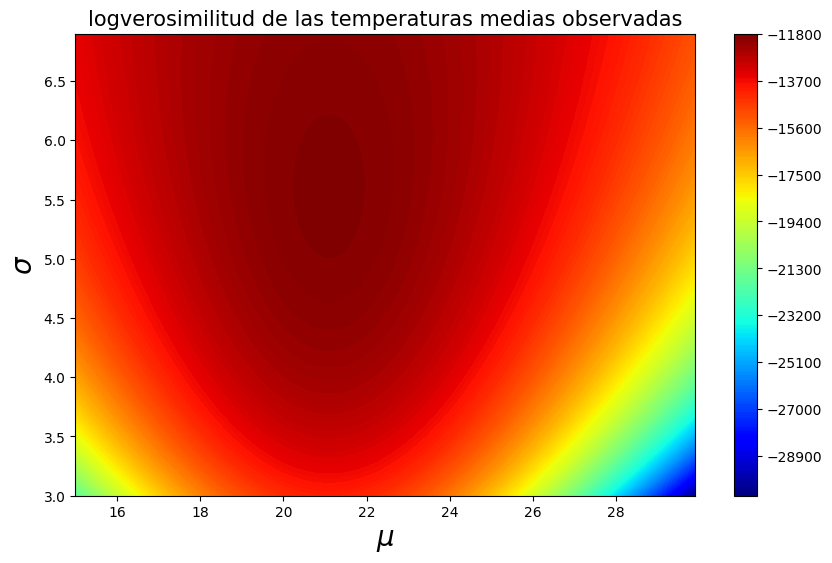

In [72]:
from scipy.stats import norm

# posibles valores de la media (mu)y la desviación estandar (sigma)
range_mu = arange(15, 30, 0.1)
range_sigma = arange(3, 7, 0.1)

# cálculo para la función de logverosimilitud para cada par de (mu, sigma)
tab_ML = zeros((len(range_mu), len(range_sigma)))
for i_mu in range(len(range_mu)):
  for i_sigma in range(len(range_sigma)):
    tab_ML[i_mu, i_sigma] = sum(norm.logpdf(dc.TAVG, loc=range_mu[i_mu], scale=range_sigma[i_sigma]))

# plot results
RANGE_sigma, RANGE_mu = np.meshgrid(range_sigma, range_mu)
contourf(RANGE_mu, RANGE_sigma, tab_ML, 200, cmap='jet')
colorbar()
xlabel('$\mu$', size=20)
ylabel('$\sigma$', size=20)
title('logverosimilitud de las temperaturas medias observadas', size=15)



b) Verifique que la media y la desviación estándar muestrales correspondan al máximo de la función de logverosimilitud.

Logverosimilitud de la media y la desviación estandar muestrales: -11856.17191707501


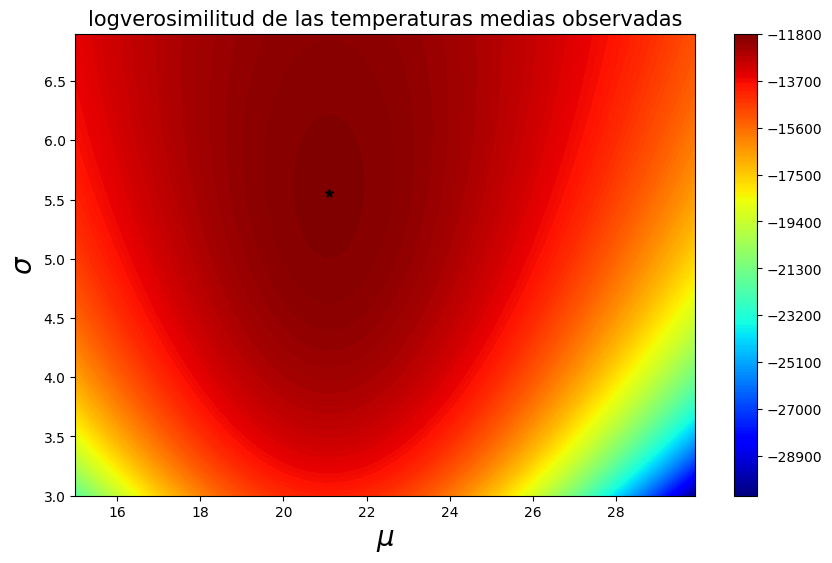

In [74]:
#############
### b)    ###

# comprobar que la media y la desviación estándar muestrales producen el máximo de la función de logverosimilitud:

print('Logverosimilitud de la media y la desviación estandar muestrales:',
      sum(norm.logpdf(dc.TAVG, loc=mean(dc.TAVG), scale=std(dc.TAVG))))

# plot results
RANGE_sigma, RANGE_mu = np.meshgrid(range_sigma, range_mu)
contourf(RANGE_mu, RANGE_sigma, tab_ML, 200, cmap='jet')
colorbar()
xlabel('$\mu$', size=20)
ylabel('$\sigma$', size=20)
title('logverosimilitud de las temperaturas medias observadas', size=15)
scatter(mean(dc.TAVG), std(dc.TAVG), marker='*', color='k')

### TO DO ###
#############

1.4) a) Ajuste una distribución normal para la temperatura media de la ciudad de Corrientes y analice la calidad del ajuste.

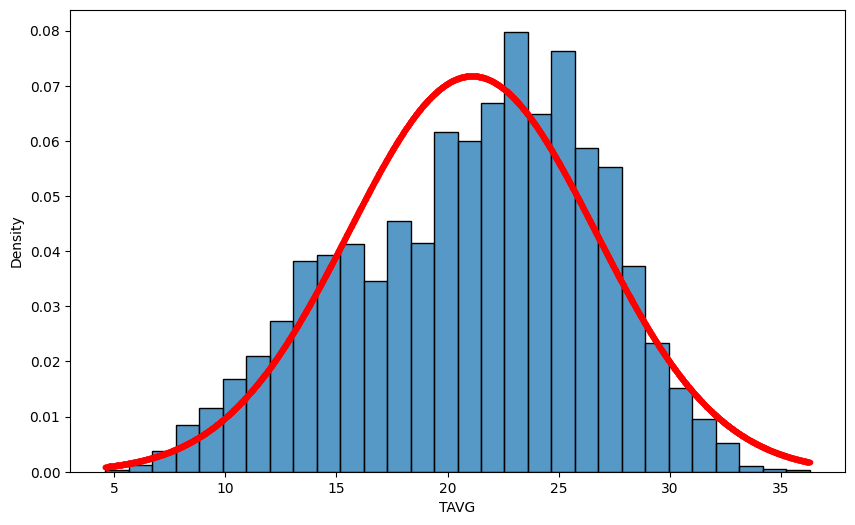

In [75]:
#gráfico: histograma de TAVG y densidad de distribución normal con parámetros EMV.
sns.histplot(dc.TAVG, stat='density')
x_axis = np.arange(np.min(dc.TAVG), np.max(dc.TAVG), 0.01)
fit_TAVG = norm.pdf(x_axis, loc=mean(dc.TAVG), scale=std(dc.TAVG))
plot(x_axis, fit_TAVG, 'r.', label='Normal')



b) Realice un test de normalidad para la temperatura media en la ciudad de Corrientes.

In [77]:
# Test de Normalidad de Lilliefors
from statsmodels.stats.diagnostic import lilliefors
stat, p_value=lilliefors(dc.TAVG)
stat

# Si el p-valor es menor a 0.05; se rechaza la hipótesis de normalidad a un nivel de confianza del 95%.

0.06082165261967959

1.5) Utilizando GMM, ajuste una mezcla de k distribuciones normales para TAVG. Para cada valor de K evalue la calidad de ajuste.

Logverosimilitud para mezcla de4distribuciones normales: -11718.911541935637


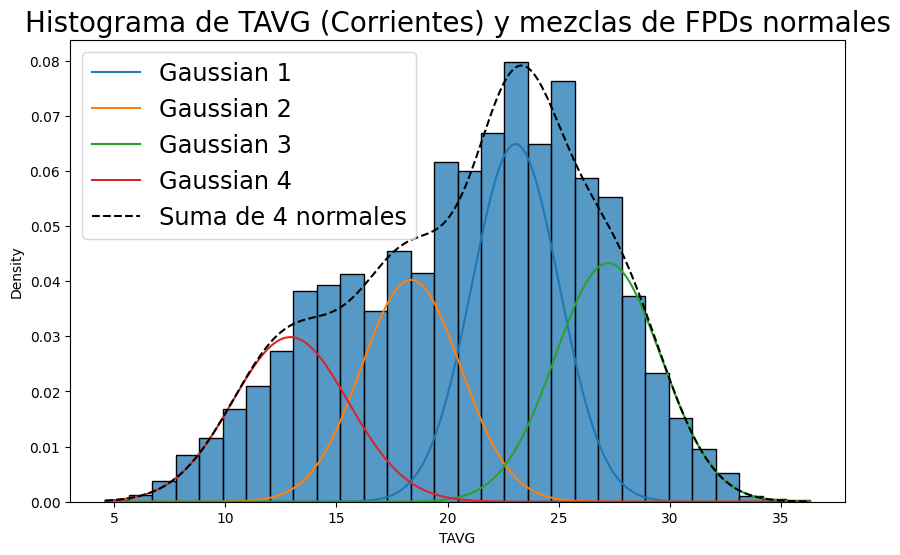

In [80]:
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

# número de FDPs normales.
K=4 #Probar con diferentes valores de K

# ajustar una mezcla de k distrubuciones normales.

gmm = GaussianMixture(n_components=K).fit(array([dc.TAVG]).T)
means = ravel(gmm.means_)
variances = ravel(gmm.covariances_)
weights = ravel(gmm.weights_)

# plot the 1D-histogram and the fit using K Gaussian distributions
sns.histplot(dc.TAVG, stat='density')
x_axis = np.arange(np.min(dc.TAVG), np.max(dc.TAVG), 0.01)
total_fit_TAVG = zeros(len(x_axis))
for k in range(K):
  fit_TAVG = norm.pdf(x_axis, means[k], sqrt(variances[k]))*weights[k]
  total_fit_TAVG += fit_TAVG
  plot(x_axis, fit_TAVG, label='Gaussian ' + str(k+1))
plot(x_axis, total_fit_TAVG, 'k--', label='Suma de ' + str(K) + ' normales')
title('Histograma de TAVG (Corrientes) y mezclas de FPDs normales', size=20)
legend(fontsize = 'xx-large')

# cálculo de la logverosimilitud para mezcla de K distribuciones normales.
print('Logverosimilitud para mezcla de' + str(K) + 'distribuciones normales:',
      sum(gmm.score_samples(array([dc.TAVG]).T)))

Text(0.5, 0, 'Nro. de componentes')

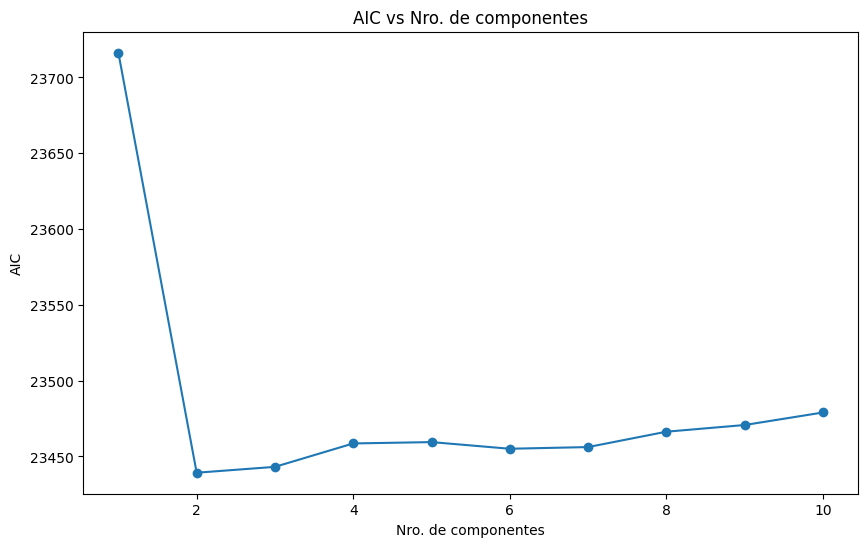

In [81]:
#Determinar el número óptimo de normales.
n_components=range(1,11)
models=[GaussianMixture(n).fit(array([dc.TAVG]).T) for n in n_components]
aics=[model.aic(array([dc.TAVG]).T) for model in models]

plt.figure(figsize(10,6))
plt.plot(n_components,aics,marker='o')
plt.title('AIC vs Nro. de componentes')
plt.ylabel('AIC')
plt.xlabel('Nro. de componentes')

1.6) Realizar el mismo análisis para la temperatura mínima de la ciudad de Resistencia. ¿Es necesario considerar mezcla de distribuciones normales? (TAREA)

1.7) Calcule la covarianza y la correlación entre las temperaturas, con promedios mensuales por año, de ambas ciudades. Para ello, utilice las funciones *cov* y *corrcoef*, respectivamente. Explique cada elemento de la matriz de covarianza. Compruebe también las relaciones entre correlación y covarianza.

In [94]:
dc['DATE'] = pd.to_datetime(dc['DATE'], format='%Y-%m-%d')
dc.set_index('DATE',inplace=True)
pr_y_m=dc.groupby([dc.index.year,dc.index.month]).mean()
print(pr_y_m)

             Unnamed: 0       TAVG       TMAX       TMIN
DATE DATE                                               
1980 1        16.750000  27.575000  33.375000  19.125000
     2        45.214286  26.621429  33.714286  19.214286
     3        77.222222  28.944444  33.888889  22.555556
     4       104.307692  25.346154  31.538462  20.230769
     5       134.846154  21.376923  25.846154  16.153846
...                 ...        ...        ...        ...
2023 4     15160.222222  21.222222  28.133333  16.444444
     5     15193.181818  19.309091  25.672727  14.736364
     6     15221.812500  17.293750  23.787500  13.081250
     7     15249.230769  17.284615  23.415385  13.084615
     8     15279.000000  17.933333  28.083333  11.550000

[435 rows x 4 columns]


In [101]:
dr['DATE'] = pd.to_datetime(dr['DATE'], format='%Y-%m-%d')
dr.set_index('DATE',inplace=True)
pr_y_m_rcia=dr.groupby([dr.index.year,dr.index.month]).mean()
print(pr_y_m_rcia)

             Unnamed: 0       TAVG       TMAX       TMIN
DATE DATE                                               
1980 1     28590.000000  25.393548  32.745161  18.922581
     2     28620.000000  25.631034  32.779310  19.372414
     3     28650.000000  26.748387  32.432258  21.890323
     4     28680.500000  23.346667  29.250000  18.716667
     5     28711.000000  19.951613  25.212903  15.841935
...                 ...        ...        ...        ...
2023 4     44384.000000  20.580000  29.140000  14.500000
     5     44413.571429  17.557143  25.571429  11.928571
     6     44444.428571  16.185714  24.114286  11.871429
     7     44468.750000  18.275000  23.900000  12.775000
     8     44499.500000  18.425000  28.000000  11.175000

[512 rows x 4 columns]


In [104]:
data={'Corrientes':pr_y_m.TAVG.T,
      'Resistencia':pr_y_m_rcia.TAVG.T}
data=pd.DataFrame(data)
data

Corrientes  Resistencia
DATE DATE                         
1980 1      27.575000    25.393548
     2      26.621429    25.631034
     3      28.944444    26.748387
     4      25.346154    23.346667
     5      21.376923    19.951613
...               ...          ...
2023 4      21.222222    20.580000
     5      19.309091    17.557143
     6      17.293750    16.185714
     7      17.284615    18.275000
     8      17.933333    18.425000

[524 rows x 2 columns]

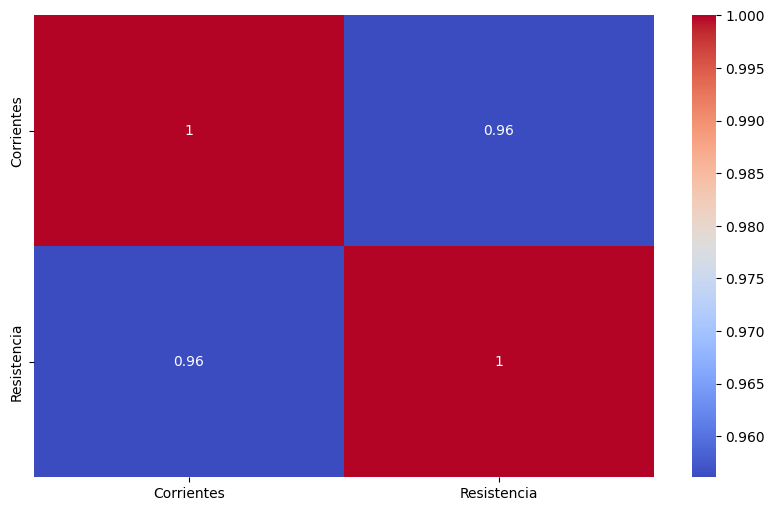

In [105]:
# Matriz de covarianza
dd_mat_corr = data.corr()
sns.heatmap(dd_mat_corr, cmap='coolwarm', annot=True)

plt.savefig("heatmap.pdf", format = "pdf")

**Actividad para el hogar: **

1. Calcule la matriz de correlación de las temperaturas promedios por año y mes, teniendo en cuenta las cuatro ciudades de la base de datos.

2. Comente acerca de los valores de estas correlaciones. ¿Eran esperables?




